<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-Aug-2023/blob/main/Scaler_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Business Case: Scaler - Clustering


Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

Dataset:

Dataset Link: scaler_kmeans.csv

Data Dictionary:

‘Unnamed 0’- Index of the dataset
Email_hash- Anonymised Personal Identifiable Information (PII)
Company_hash- Current employer of the learner
orgyear- Employment start date
CTC- Current CTC
Job_position- Job profile in the company
CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)
Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering
What does “good” look like?

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary.
Checking for missing values and Prepare data for KNN/ Mean Imputation.
You may have to remove special characters from the dataset by using Regex
Don’t worry if you haven’t used that before. The syntax is quite simple and intuitive
Code:
mystring='\tAirtel X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)
Checking for duplicates in the dataset and drop them
Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year
Manual Clustering on the basis of learner’s company, job position and years of experience
Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience
Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]
Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]
Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]
Based on the manual clustering done so far, answering few questions like:
Top 10 employees (earning more than most of the employees in the company) - Tier 1
Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1
Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3
Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X
Top 10 companies (based on their CTC)
Top 2 positions in every company (based on their CTC)
Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data
Unsupervised Learning - Clustering
Checking clustering tendency
Elbow method
K-means clustering
Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)
Insights from Unsupervised Clustering
Provide actionable Insights & Recommendations for the Business.
Evaluation Criteria (100 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Pre-processing: (30 Points)
Mean/ KNN Imputation
Regex for cleaning company names
Standardization & Encoding
Manual Clustering: (30 Points)
Creating Designation Flag & Insights
Creating Class Flag & Insights
Creating Tier Flag & Insights
Unsupervised learning: (20 Points)
Checking clustering tendency, Elbow method & K- means clustering
Hierarchical Clustering
Actionable Insights & Recommendations (10 Points

In [ ]:
import pandas as pd
import numpy as np
import seaborn as san
import matplotlib.pyplot as plt
import re
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')

In [ ]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


‘Unnamed 0’- Index of the dataset eg. 0,1,2

Email_hash- Anonymised Personal Identifiable Information (PII) eg. atrgxnnt xzaxv
Company_hash- Current employer of the learner 6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...

orgyear- Employment start date CTC- Current eg.2016.0

 CTC - eg. 1100000

Job_position- Job profile in the company 	eg. Backend Engineer, others


CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions) eg 2020.0

In [ ]:
df.shape

(205843, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153281,1017,Backend Engineer,43554


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,205843.0,1.032739e+05,5.974131e+04,0.0,51518.5,103151.0,154992.5,2.069220e+05
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [ ]:
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

No duplicate rows

In [ ]:
df['email_hash'].value_counts().head(10)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
Name: email_hash, dtype: int64

Insight: Each email-hash is a group of records.

In [ ]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


Insight:
if we view records associated with multiple records we find that there is some records for PII having same company_hash, orgyear, with differemt job_position that means one employee is joining in two post in same company in same orgyear that cant possible.
for eg. 102915	103145	oxej ntwyzgrgsxto rxbxnta	bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...	2018.0	720000	FullStack Engineer	2020.0
117764	118076	oxej ntwyzgrgsxto rxbxnta	bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...	2018.0	720000	Data Analyst	2020.0

so consider only first record

In [ ]:
df = df.groupby('email_hash').first().reset_index()
df.shape

(153443, 7)

insight: 205843 rows now shrink to 153443 rows after eliminating or taking first records of same group.

**Feature Engineering**

creating column to assign 'True' for null values for fetures 'orgyear','ctc_updated_year','company_hash','job_position'

In [ ]:
for i in ['orgyear','ctc_updated_year','company_hash','job_position']:
    df[i+'_na'] = df[i].isna()

In [ ]:
df.head(5)

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0,False,False,False,False
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,gunhb,2021.0,1300000,FullStack Engineer,2019.0,False,False,False,False
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,fvrbvqn rvmo,2009.0,3400000,None,2018.0,False,False,False,True


remove special characters from the dataset by using Regex

In [ ]:
text_cols = ['company_hash']
for i in text_cols:
    df[i] = df[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [ ]:
df.head()

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,Nqsn Axsxnvr,2013.0,250000,Backend Engineer,2020.0,False,False,False,False
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,Gunhb,2021.0,1300000,FullStack Engineer,2019.0,False,False,False,False
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,None,2018.0,False,False,False,True


adding feature  ‘Years of Experience’ column by subtracting orgyear from current year

In [ ]:
df['YoE'] = df['ctc_updated_year'] - df['orgyear']

 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience

In [ ]:
col = 'company_hash'
df[col] = df[col].fillna('na')
enc_nom = (df.groupby(col).size()) / len(df)
df[col+'_encode'] = df[col].apply(lambda x : enc_nom[x])

col = 'job_position'
df[col] = df[col].fillna('na')
enc_nom = (df.groupby(col).size()) / len(df)*10000
df[col+'_encode'] = df[col].apply(lambda x : enc_nom[x])

In [ ]:
df

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False,7.0,0.010160,2431.717315
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,Nqsn Axsxnvr,2013.0,250000,Backend Engineer,2020.0,False,False,False,False,7.0,0.000007,2431.717315
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,Gunhb,2021.0,1300000,FullStack Engineer,2019.0,False,False,False,False,-2.0,0.001004,1319.056588
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,na,2018.0,False,False,False,True,9.0,0.003760,1318.013855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,Tqxwoogz Ogenfvqt Wvbuho,2004.0,3529999,QA Engineer,2019.0,False,False,False,False,15.0,0.000007,401.973371
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,Trnqvcg,2015.0,1600000,na,2018.0,False,False,False,True,3.0,0.000007,1318.013855
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,Znn Avnv Srgmvr Atrxctqj Otqcxwto,2014.0,900000,Devops Engineer,2019.0,False,False,False,False,5.0,0.000124,279.908500
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,14115,Zwq Wgqugqvnxgz,2020.0,700000,FullStack Engineer,2020.0,False,False,False,False,0.0,0.000867,1319.056588


IndexError: ignored

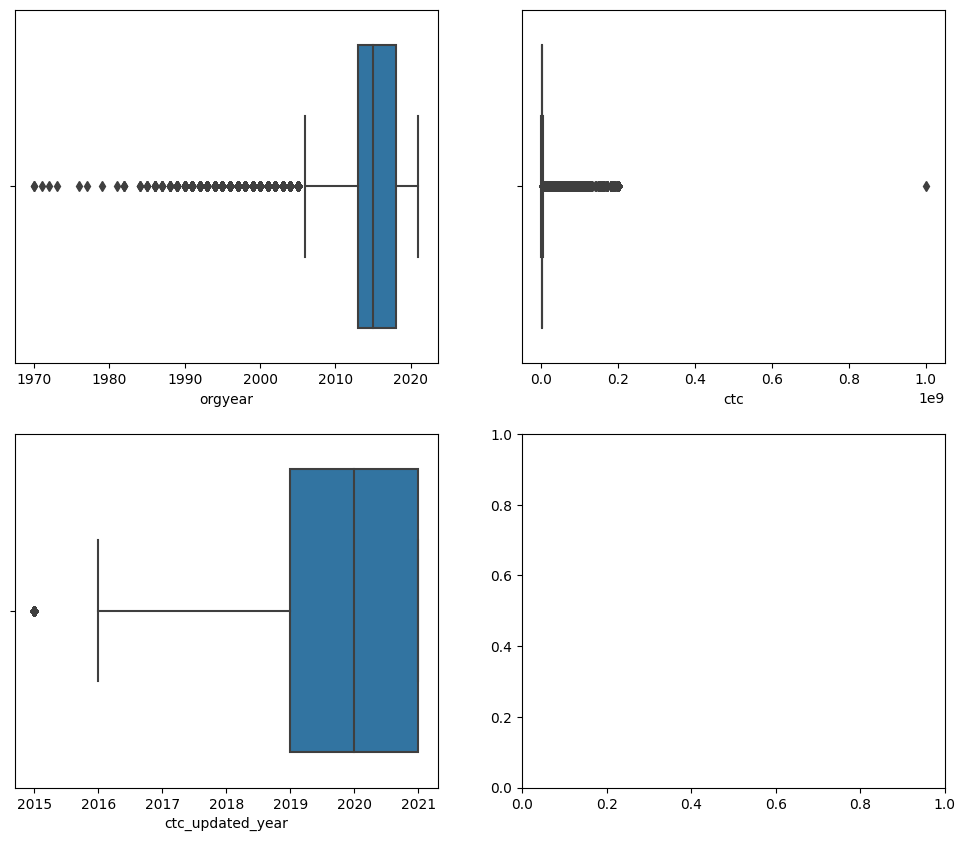

In [ ]:
cols=['orgyear',	'ctc',	'ctc_updated_year']
f,a=plt.subplots(nrows=2, ncols=2, figsize=(12,2))
i=0
f.subplots_adjust(top=4)
for row in range(2):
  for col in range(2):
    san.boxplot(data=df, x=cols[i],ax=a[row,col])
    i+=1
plt.show()

In [ ]:
cols=['ctc',	'ctc_updated_year']
for i in range(len(cols)):
  print("outlier in  " +cols[i] )
  IQR=np.percentile(df[cols[i]],75)-np.percentile(df[cols[i]],25)
  print("IQR : ",IQR)
  Q1=np.percentile(df[cols[i]],25)
  print('Q1 : ',Q1)
  Q3=np.percentile(df[cols[i]],75)
  print('Q3 : ', Q3)
  upperlimit=Q3+(IQR*1.5)
  print("upperlimit : ",upperlimit)
  lowerlimit=Q1-(IQR*1.5)
  print("lowerlimit : ",lowerlimit)
  outlier=df[(df[cols[i]]>upperlimit) |(df[cols[i]]<lowerlimit)]
  print("outlier in" +cols[i] +": ",len(outlier))
  print("*********************************************")
  i+=1


outlier in  ctc
IQR :  1150000.0
Q1 :  550000.0
Q3 :  1700000.0
upperlimit :  3425000.0
lowerlimit :  -1175000.0
outlier inctc:  9953
*********************************************
outlier in  ctc_updated_year
IQR :  2.0
Q1 :  2019.0
Q3 :  2021.0
upperlimit :  2024.0
lowerlimit :  2016.0
outlier inctc_updated_year:  1499
*********************************************


Insight:
There are 10529 outlier in ctc and 2572 in ctc_updated_year.

In [ ]:
cols=['ctc',	'ctc_updated_year']

for i in range(2):
  Q1=df[cols[i]].quantile(0.25)
  Q3=df[cols[i]].quantile(0.75)
  IQR=Q3-Q1
  df = df[~((df[cols[i]] < (Q1 - 1.5 * IQR)) | (df[cols[i]] > (Q3 + 1.5 * IQR)))]
  df.reset_index(drop=True)

Outlier treatment for orgyear:

In [ ]:
sorted(df['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

Insight : There are some orgyear which has values less than 4 digits and among four digits there are some future year which should remove .

In [ ]:
df = df[~df['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900, 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [ ]:
df = df[~(df['YoE']<0)]

In [ ]:
df

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False,7.0,0.010160,2431.717315
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,Nqsn Axsxnvr,2013.0,250000,Backend Engineer,2020.0,False,False,False,False,7.0,0.000007,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,na,2018.0,False,False,False,True,9.0,0.003760,1318.013855
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,947,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000,Database Administrator,2020.0,False,False,False,False,2.0,0.034221,33.497781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,Tqxwoogz Ogenfvqt Wvbuho,2004.0,3529999,QA Engineer,2019.0,False,False,False,False,15.0,0.000007,401.973371
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,Trnqvcg,2015.0,1600000,na,2018.0,False,False,False,True,3.0,0.000007,1318.013855
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,Znn Avnv Srgmvr Atrxctqj Otqcxwto,2014.0,900000,Devops Engineer,2019.0,False,False,False,False,5.0,0.000124,279.908500
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,14115,Zwq Wgqugqvnxgz,2020.0,700000,FullStack Engineer,2020.0,False,False,False,False,0.0,0.000867,1319.056588


Univariate analysis

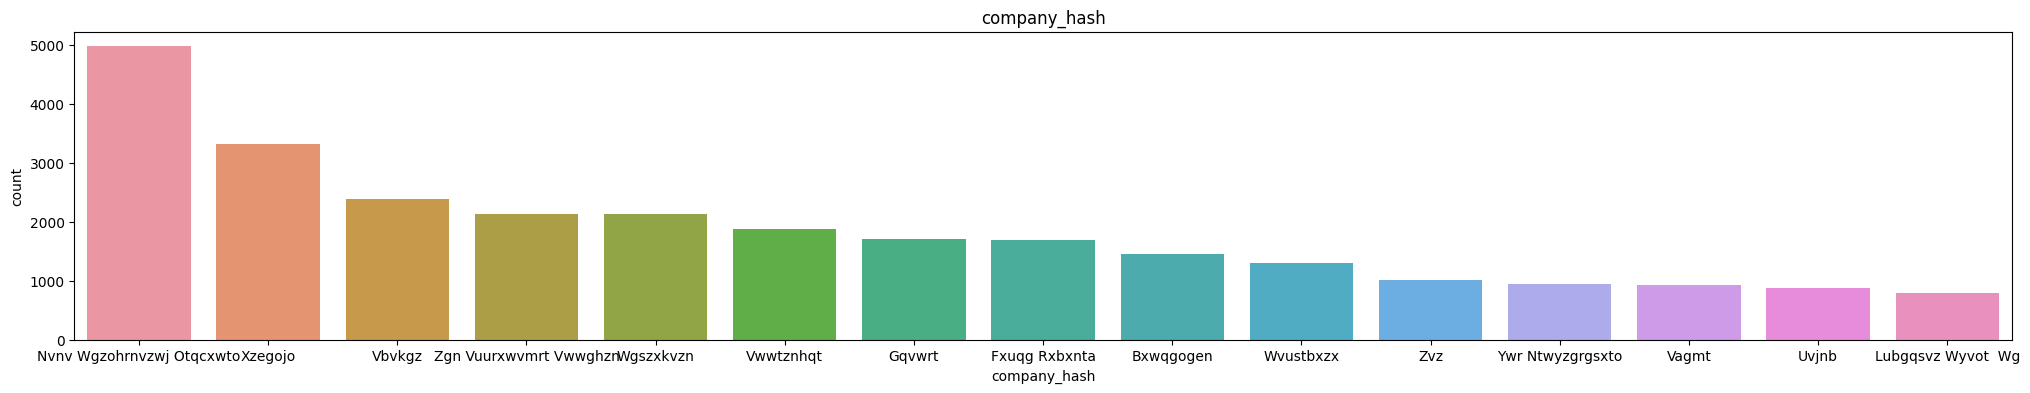

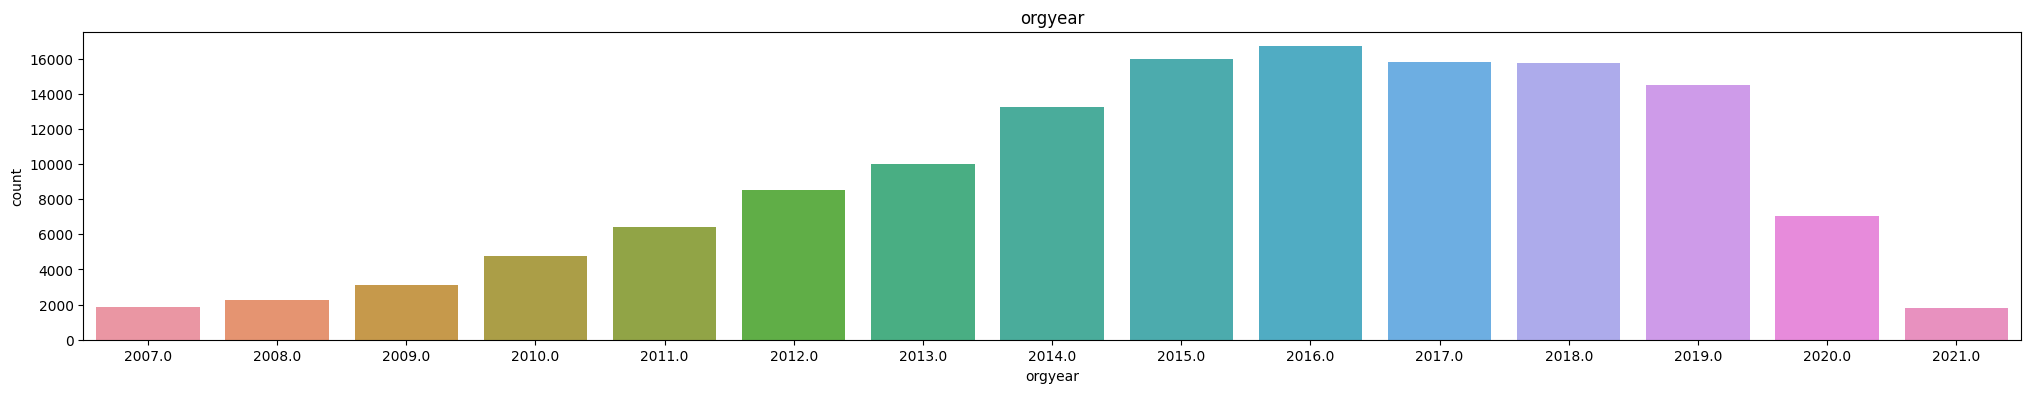

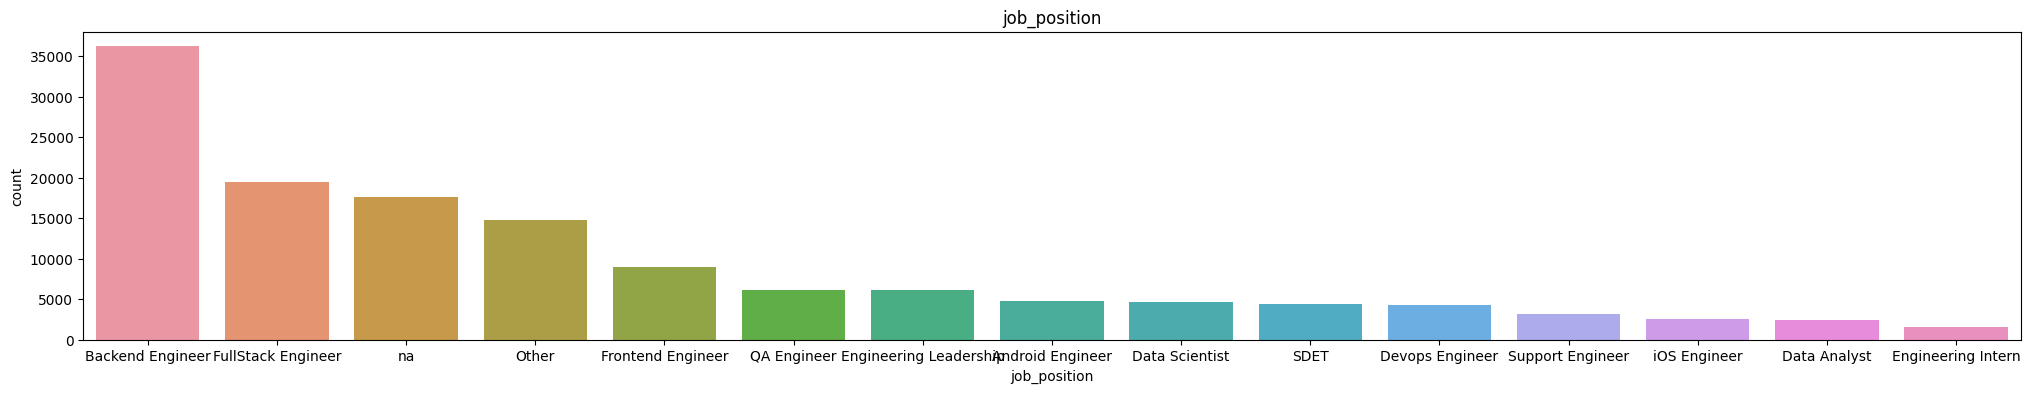

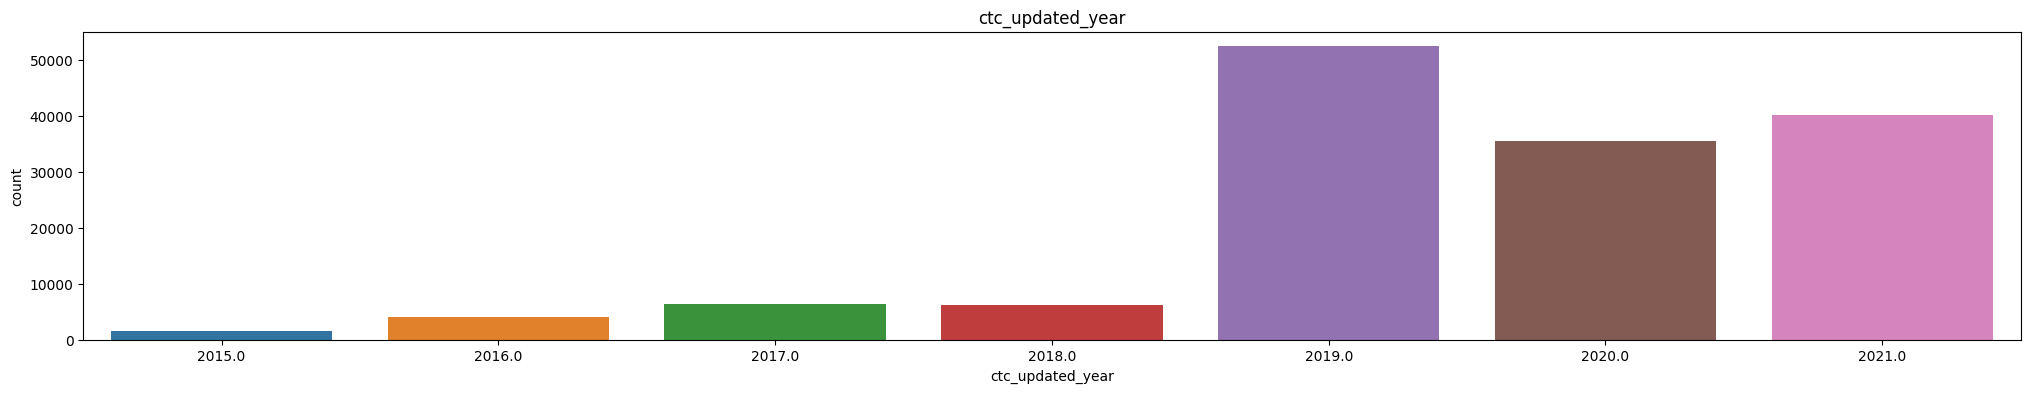

In [ ]:
cols=['company_hash',	'orgyear','job_position',	'ctc_updated_year']
for i in cols:
    tmp = df.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,4))
    san.barplot(data=tmp,y='count',x=i).set(title=i)
    plt.show()

Insight:
Nvnv Wgzohrnvzwj is the compnay where most of the staff works (5000).
2015-2019 is the most orgyear.
almost 35000 employees are Backend Engineeers. 2019 is the most Ctc update year.




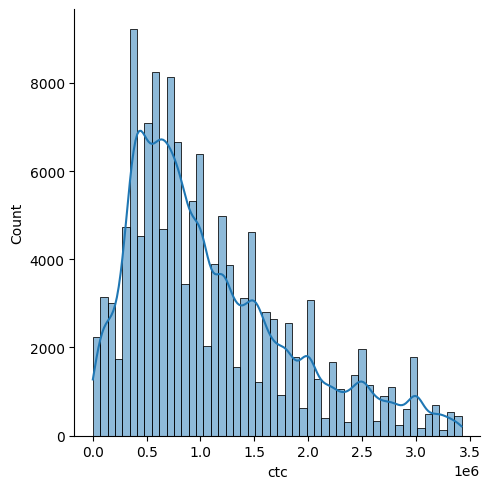

In [ ]:
#continuous varaible ctc
san.displot(df['ctc'],kde=True,bins=50)
plt.show()

Insight:
0.3 to 1.0 bin is the range of the CTC of many employees.

**multivariate analysis**

Top paying jobs (based on their CTC)

Top 10 employees (earning more than most of the employees in the company) - Tier 1 Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1 Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3 Bottom 10 employees (earning less than most of the employees in the company)- Tier 3 Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X **Top 10 companies (based on their CTC)** Top 2 positions in every company (based on their CTC) Data processing for Unsupervised clustering

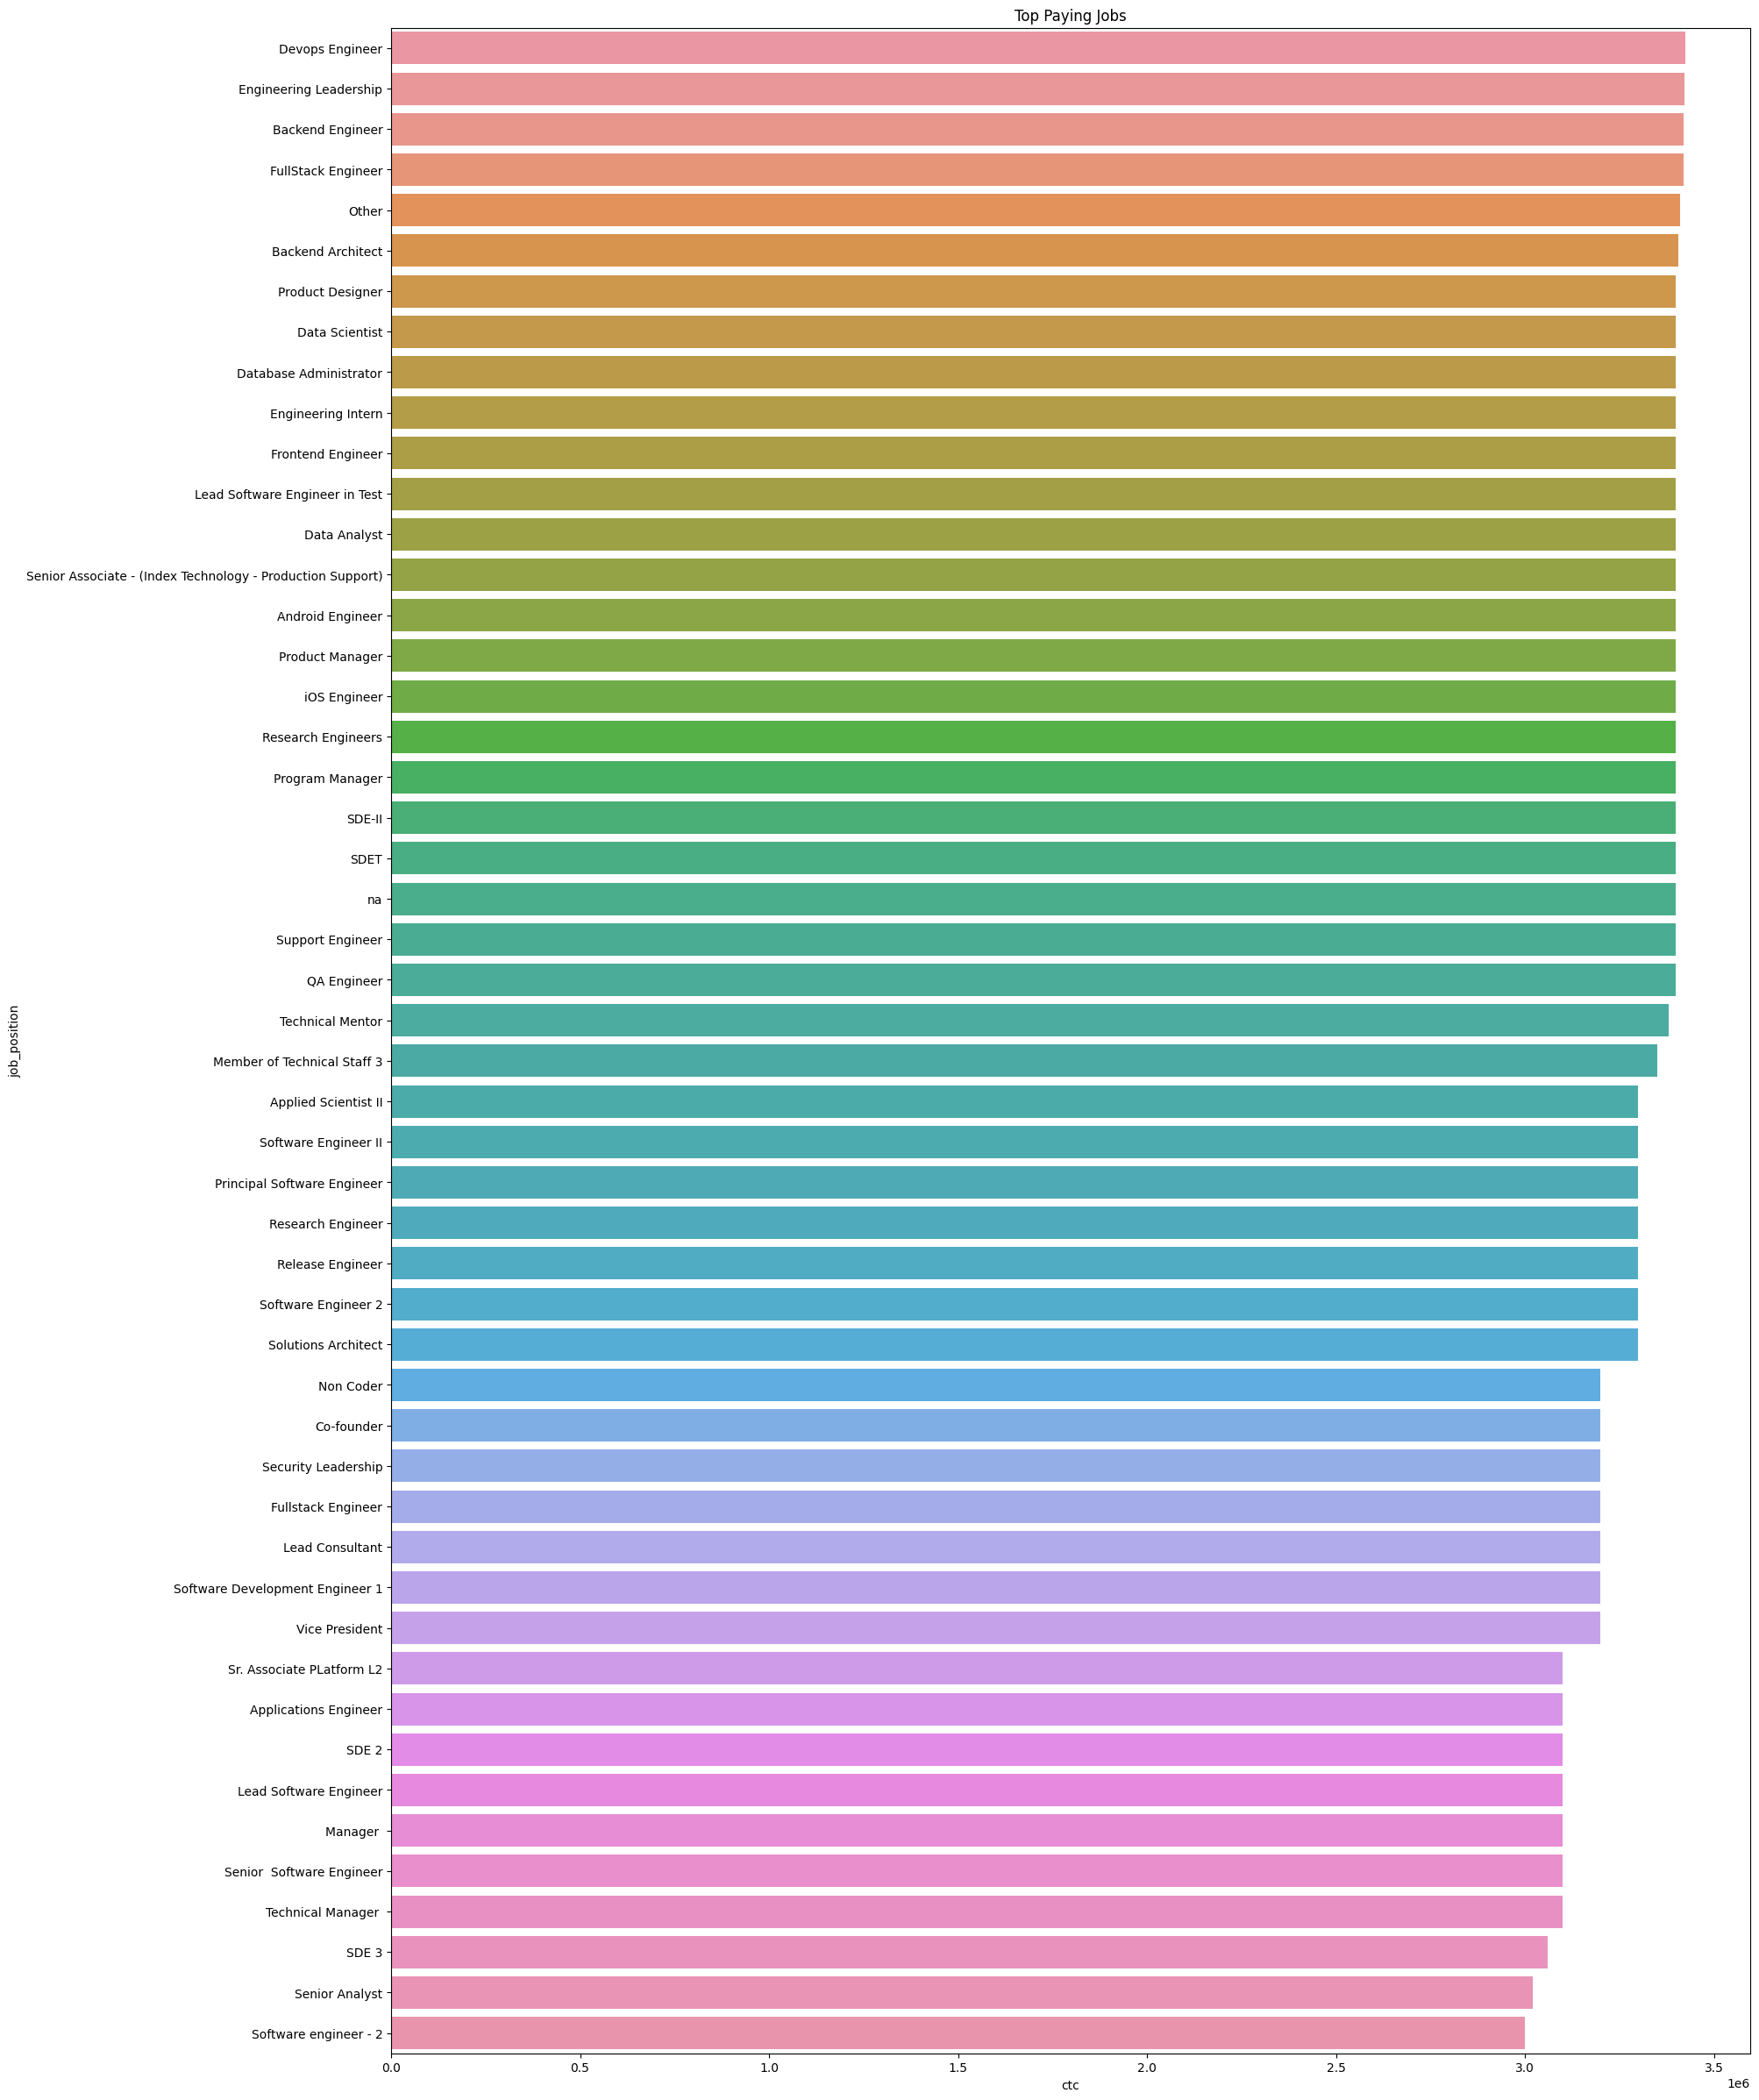

['Devops Engineer',
 'Engineering Leadership',
 'Backend Engineer',
 'FullStack Engineer',
 'Other',
 'Backend Architect',
 'Product Designer',
 'Data Scientist',
 'Database Administrator',
 'Engineering Intern',
 'Frontend Engineer',
 'Lead Software Engineer in Test',
 'Data Analyst',
 'Senior Associate - (Index Technology - Production Support)',
 'Android Engineer',
 'Product Manager',
 'iOS Engineer',
 'Research Engineers',
 'Program Manager',
 'SDE-II',
 'SDET',
 'na',
 'Support Engineer',
 'QA Engineer',
 'Technical Mentor',
 'Member of Technical Staff 3',
 'Applied Scientist II',
 'Software Engineer II',
 'Principal Software Engineer',
 'Research Engineer',
 'Release Engineer',
 'Software Engineer 2',
 'Solutions Architect',
 'Non Coder',
 'Co-founder',
 'Security Leadership',
 'Fullstack Engineer',
 'Lead Consultant',
 'Software Development Engineer 1',
 'Vice President',
 'Sr. Associate PLatform L2',
 'Applications Engineer',
 'SDE 2',
 'Lead Software Engineer',
 'Manager ',
 '

In [ ]:
tmp = df.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
san.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()
list(tmp['job_position'])

Insight:
Devops Engineer is the most and Engineering Leadership and Backend Engineer are the next two high paying job position.

Top Paying Companies

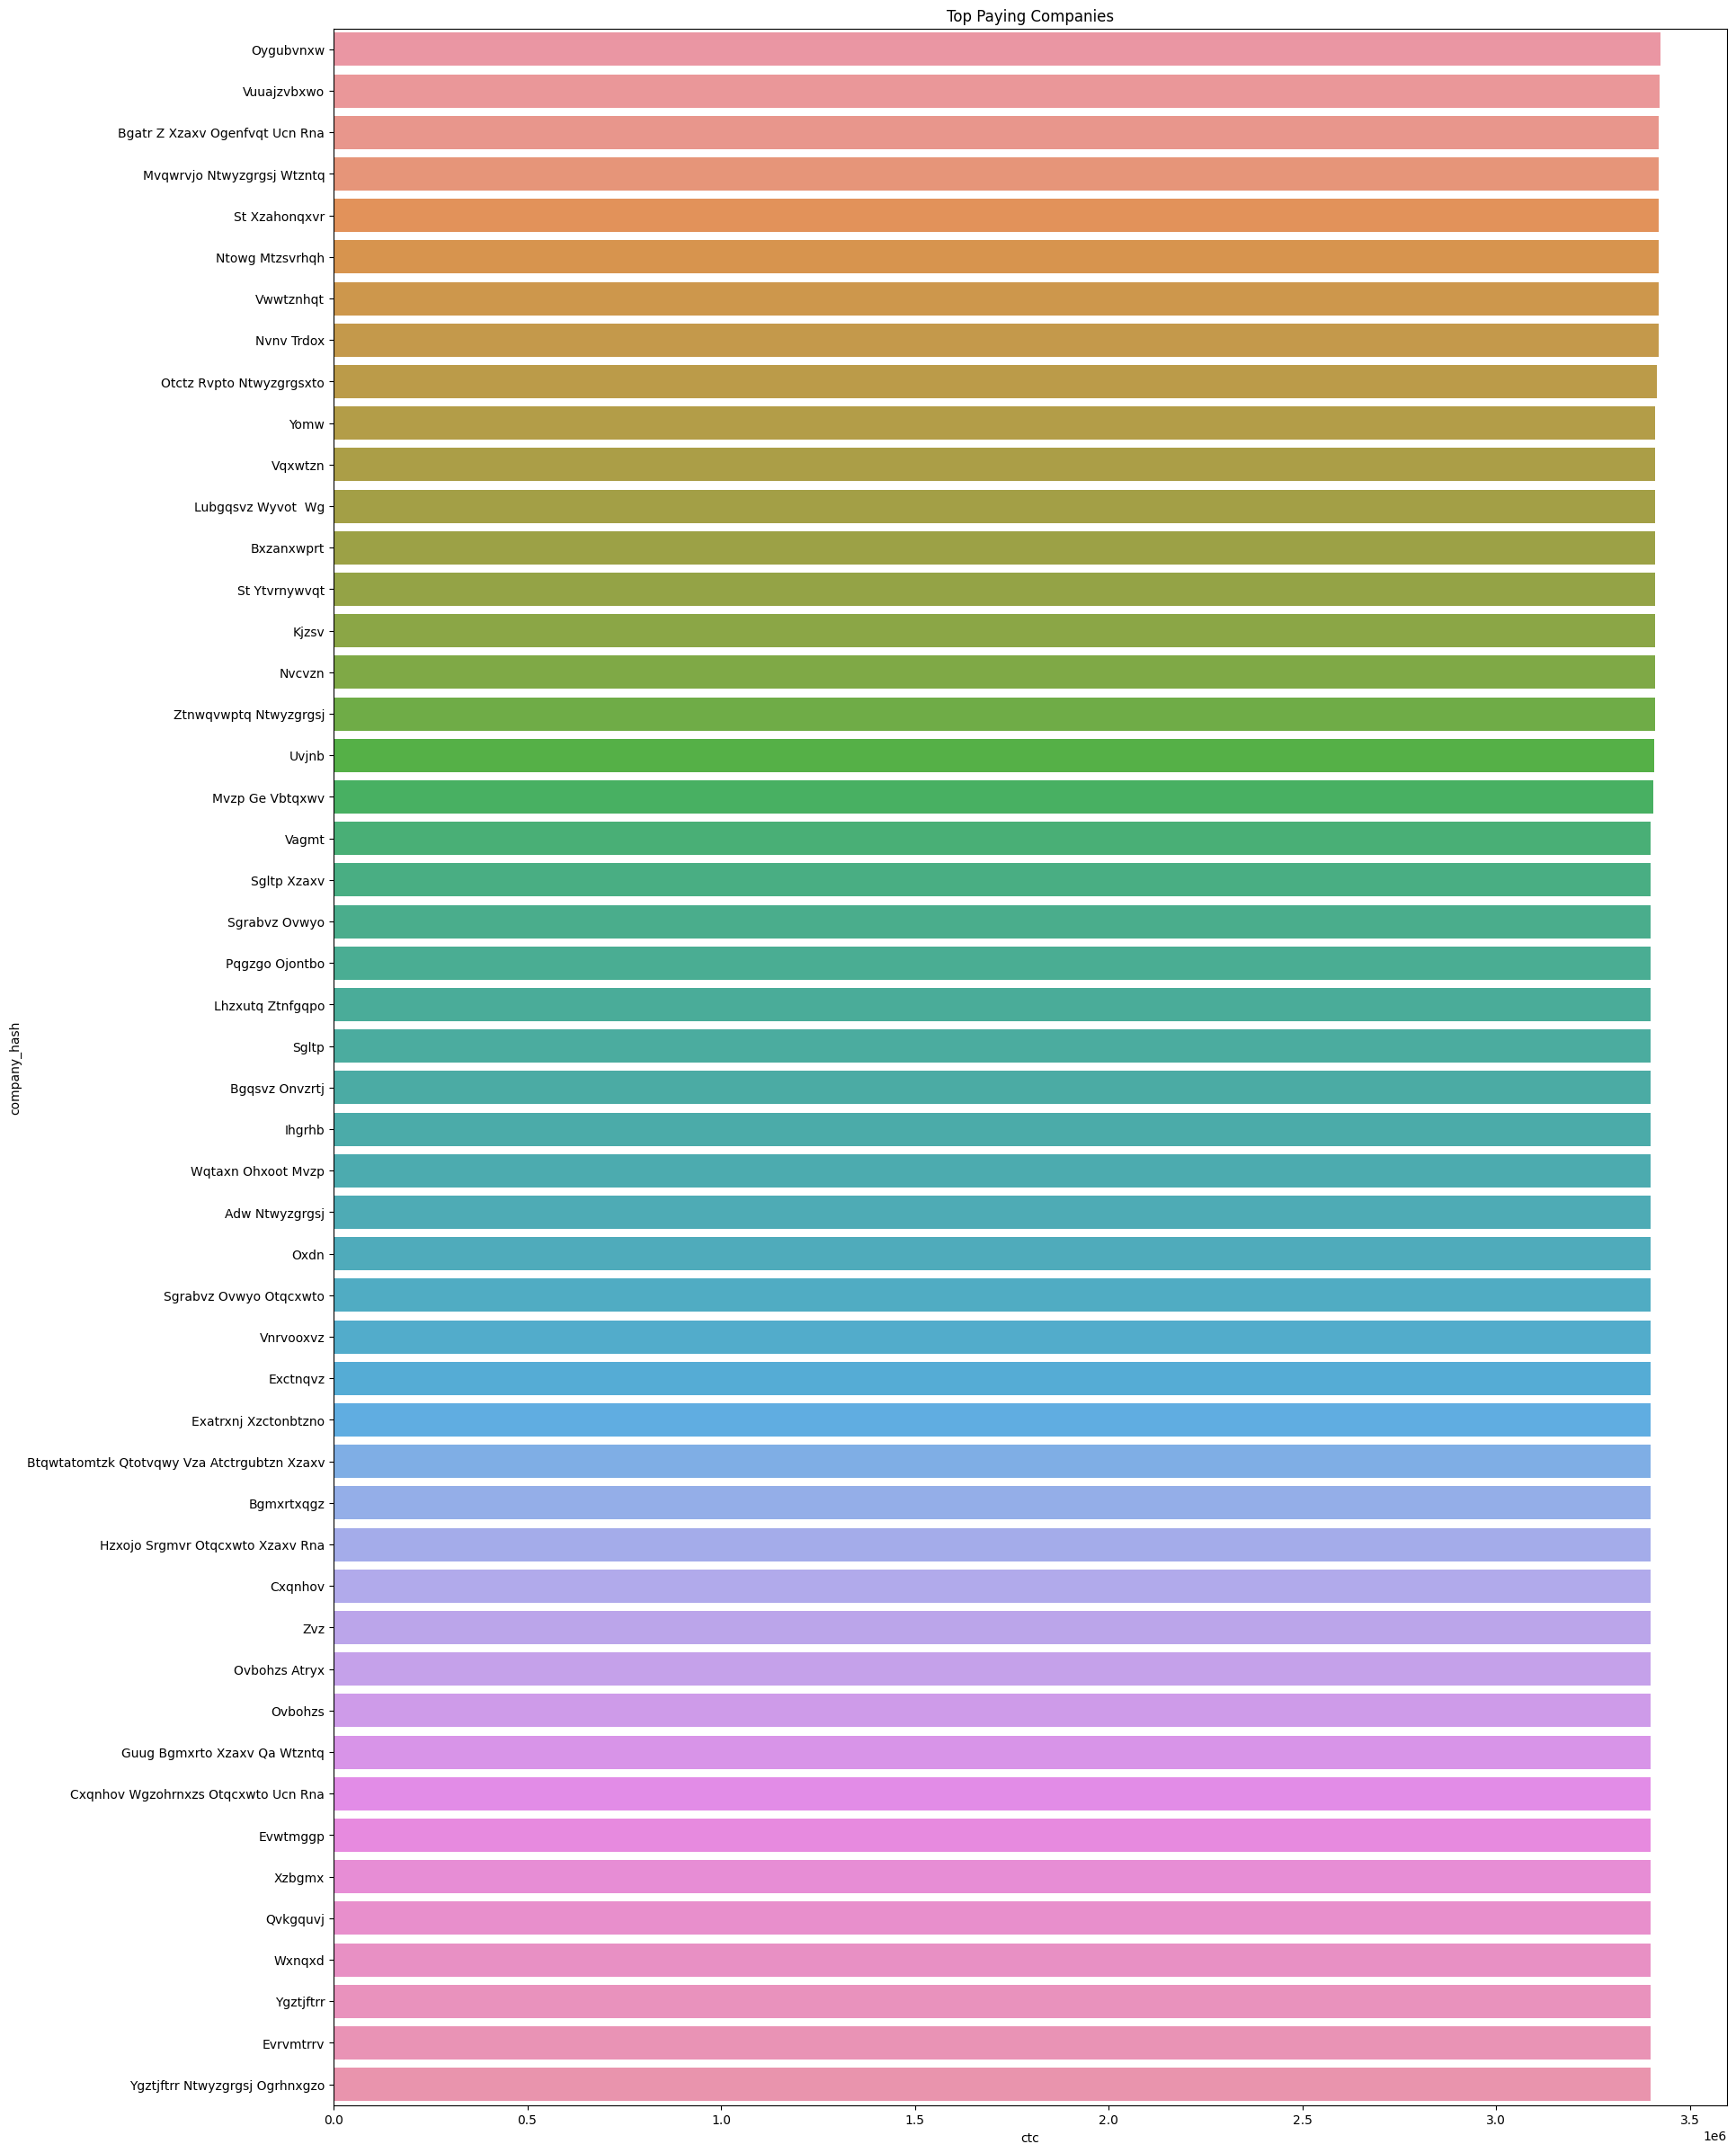

['Oygubvnxw',
 'Vuuajzvbxwo',
 'Bgatr Z Xzaxv Ogenfvqt Ucn Rna',
 'Mvqwrvjo Ntwyzgrgsj Wtzntq',
 'St Xzahonqxvr',
 'Ntowg Mtzsvrhqh',
 'Vwwtznhqt',
 'Nvnv Trdox',
 'Otctz Rvpto Ntwyzgrgsxto',
 'Yomw',
 'Vqxwtzn',
 'Lubgqsvz Wyvot  Wg',
 'Bxzanxwprt',
 'St Ytvrnywvqt',
 'Kjzsv',
 'Nvcvzn',
 'Ztnwqvwptq Ntwyzgrgsj',
 'Uvjnb',
 'Mvzp Ge Vbtqxwv',
 'Vagmt',
 'Sgltp Xzaxv',
 'Sgrabvz Ovwyo',
 'Pqgzgo Ojontbo',
 'Lhzxutq Ztnfgqpo',
 'Sgltp',
 'Bgqsvz Onvzrtj',
 'Ihgrhb',
 'Wqtaxn Ohxoot Mvzp',
 'Adw Ntwyzgrgsj',
 'Oxdn',
 'Sgrabvz Ovwyo Otqcxwto',
 'Vnrvooxvz',
 'Exctnqvz',
 'Exatrxnj Xzctonbtzno',
 'Btqwtatomtzk Qtotvqwy Vza Atctrgubtzn Xzaxv',
 'Bgmxrtxqgz',
 'Hzxojo Srgmvr Otqcxwto Xzaxv Rna',
 'Cxqnhov',
 'Zvz',
 'Ovbohzs Atryx',
 'Ovbohzs',
 'Guug Bgmxrto Xzaxv Qa Wtzntq',
 'Cxqnhov Wgzohrnxzs Otqcxwto Ucn Rna',
 'Evwtmggp',
 'Xzbgmx',
 'Qvkgquvj',
 'Wxnqxd',
 'Ygztjftrr',
 'Evrvmtrrv',
 'Ygztjftrr Ntwyzgrgsj Ogrhnxgzo']

In [ ]:
tmp = df.copy()
tmp = tmp.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
san.barplot(data=tmp,x='ctc',y='company_hash').set(title="Top Paying Companies")
plt.show()

list(tmp['company_hash'])

Insight:
Top paying company is Oygubvnxw.

Top Paying Companies Change in avg pay yearwise

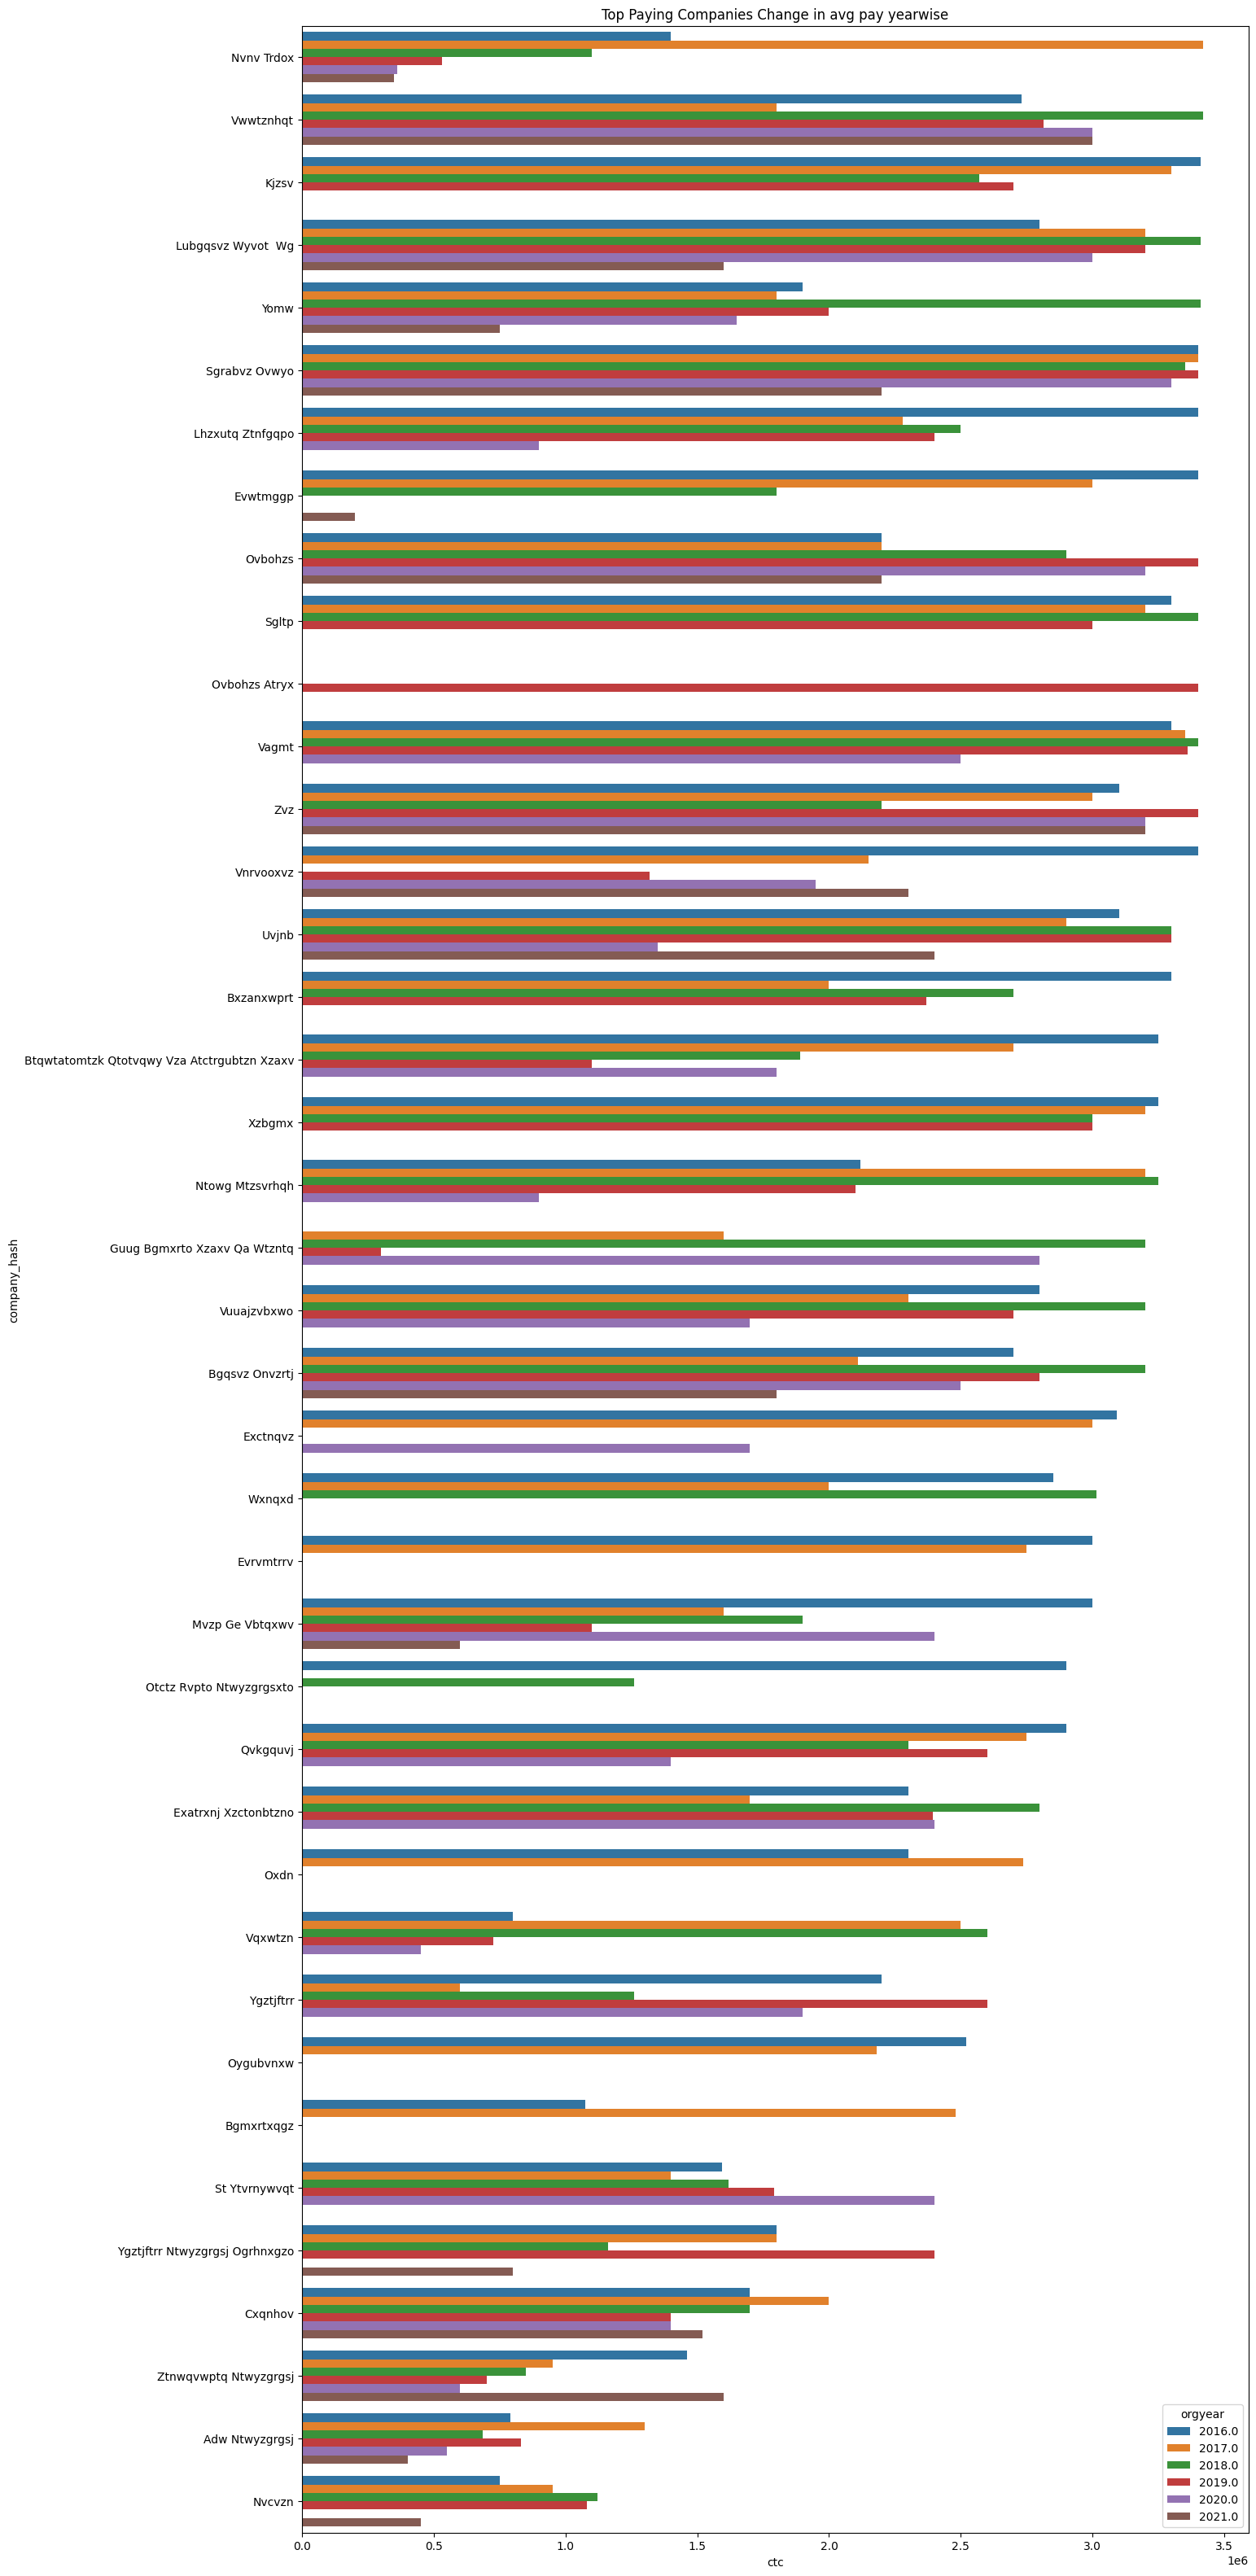

In [ ]:
tmp = df.copy()
tmp = tmp[tmp['company_hash'].isin(['Oygubvnxw',
 'Vuuajzvbxwo',
 'Bgatr Z Xzaxv Ogenfvqt Ucn Rna',
 'Mvqwrvjo Ntwyzgrgsj Wtzntq',
 'St Xzahonqxvr',
 'Ntowg Mtzsvrhqh',
 'Vwwtznhqt',
 'Nvnv Trdox',
 'Otctz Rvpto Ntwyzgrgsxto',
 'Yomw',
 'Vqxwtzn',
 'Lubgqsvz Wyvot  Wg',
 'Bxzanxwprt',
 'St Ytvrnywvqt',
 'Kjzsv',
 'Nvcvzn',
 'Ztnwqvwptq Ntwyzgrgsj',
 'Uvjnb',
 'Mvzp Ge Vbtqxwv',
 'Vagmt',
 'Sgltp Xzaxv',
 'Sgrabvz Ovwyo',
 'Pqgzgo Ojontbo',
 'Lhzxutq Ztnfgqpo',
 'Sgltp',
 'Bgqsvz Onvzrtj',
 'Ihgrhb',
 'Wqtaxn Ohxoot Mvzp',
 'Adw Ntwyzgrgsj',
 'Oxdn',
 'Sgrabvz Ovwyo Otqcxwto',
 'Vnrvooxvz',
 'Exctnqvz',
 'Exatrxnj Xzctonbtzno',
 'Btqwtatomtzk Qtotvqwy Vza Atctrgubtzn Xzaxv',
 'Bgmxrtxqgz',
 'Hzxojo Srgmvr Otqcxwto Xzaxv Rna',
 'Cxqnhov',
 'Zvz',
 'Ovbohzs Atryx',
 'Ovbohzs',
 'Guug Bgmxrto Xzaxv Qa Wtzntq',
 'Cxqnhov Wgzohrnxzs Otqcxwto Ucn Rna',
 'Evwtmggp',
 'Xzbgmx',
 'Qvkgquvj',
 'Wxnqxd',
 'Ygztjftrr',
 'Evrvmtrrv',
 'Ygztjftrr Ntwyzgrgsj Ogrhnxgzo'])]
tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['company_hash','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
san.barplot(data=tmp,x='ctc',y='company_hash',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()

Otctz Rvpto Ntwyzgargsxto and Qvkgquvj are highest paying company in 2016 whereas zvz in 2021.

Mean CTC yearwise Comparision

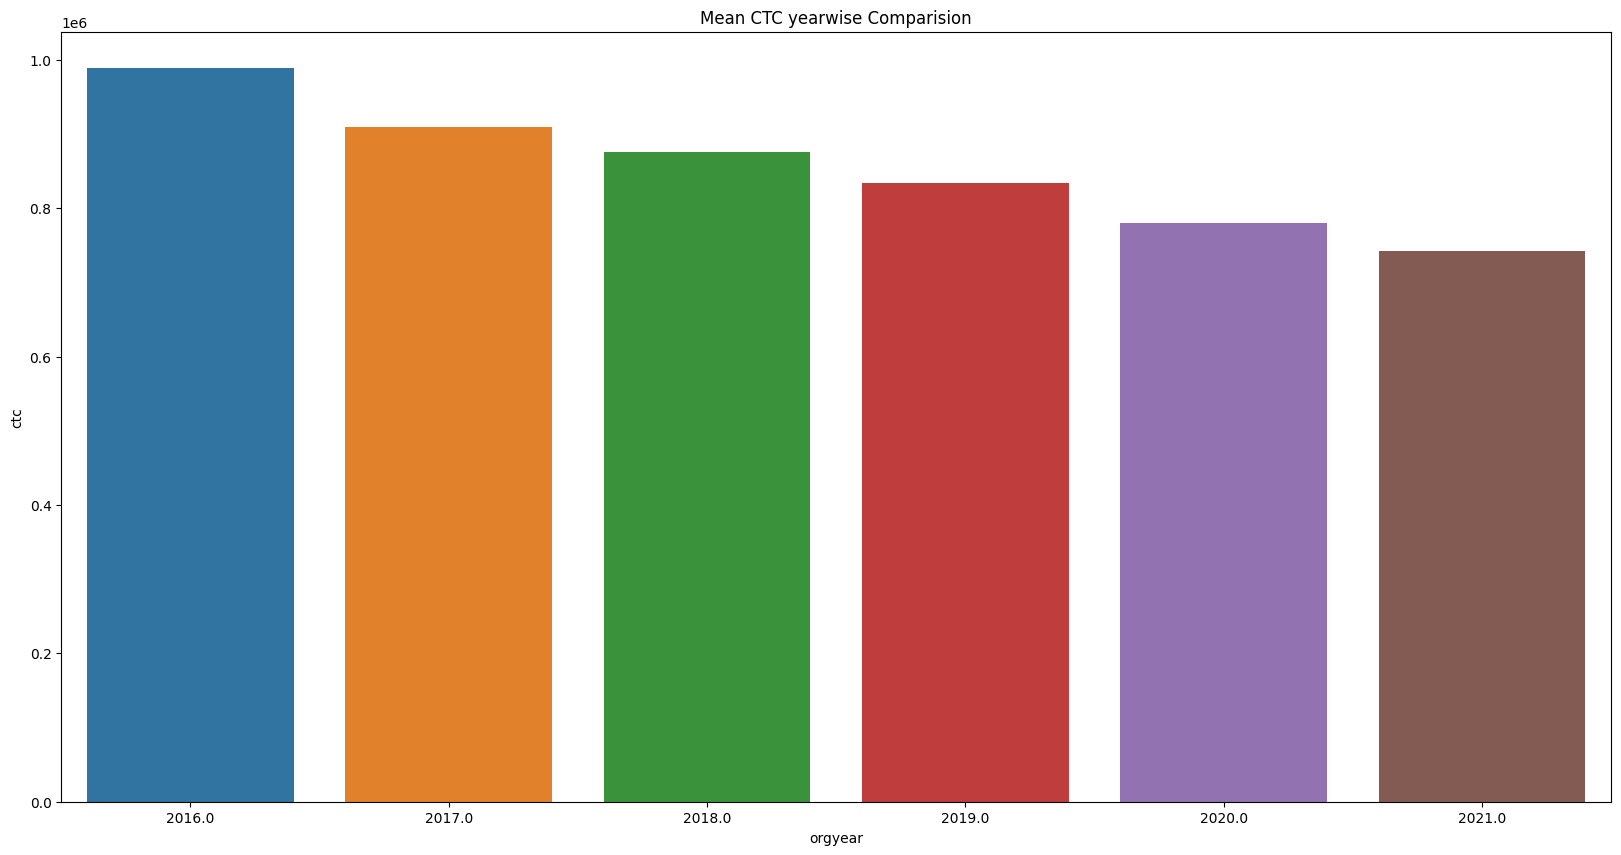

In [ ]:
tmp = df.copy()

tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
san.barplot(data=tmp,y='ctc',x='orgyear').set(title="Mean CTC yearwise Comparision")
plt.show()

Insight:
Mean CTC is decreasing yearwise . highest is in 2016 if calculated from 2016.and least in 2021

Manual clustering


In [ ]:
grp = ['company_hash','job_position','YoE']
data_tmp1 = df.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = df.merge(data_tmp1[['company_hash', 'job_position', 'YoE', 'mean ctc']],on=['company_hash', 'job_position', 'YoE'],how='left')



col1 = 'ctc'
col2 = 'mean ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Designation'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [ ]:
grp = ['company_hash']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [ ]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
103205,c41d6ade244ae41bba47acde9d69b67125409995efea4c...,3300000,436898.288136
106994,cb4fd7c836570c3dc14a64681c721cd2e6f610f434e45d...,3400000,575991.387189
128267,f3516e3ca779dec2b905a2ba7c380e918c3305b0dae588...,3400000,602000.000000
87905,a6f2fae941a508d1a2c270997d5f3689ba6e6d7e20e1f9...,3400000,605554.935385
60814,73cbc796a4302bd691bda6ad9da47ec92f366fb697869e...,3385000,686531.029966
91826,ae7a452206d4a2639ac928e17b6707a3e31d63695e075a...,3420000,748860.616657
54562,67b6df56a7662d5d470520a272d851e8ef5c4543d62a74...,3400000,742239.554034
96328,b6dbd61e6ee883b59b80258bd3b88170d6d6e903467208...,3400000,748860.616657
127855,f29cbd0f9e98f154a32ebe5fa74297a2439269fea2bbe5...,3420000,793805.405405
56072,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,575991.387189


Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1

In [ ]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
56072,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,7.489202e+05
134871,ffe6e45b1b87424286ea0e9e2f12891809a333b407f386...,3000000,8.387500e+05
40322,4cfa7e643b30a89189bcca6084c9e273a9783e83ad3b81...,2900000,7.489202e+05
33588,3fb508af01615da04ce4a8faef1573797d752ff1652fac...,3300000,1.202333e+06
56967,6c5d2a17cb6c1bb7fad67e383e5cc6c5de31895dd31f6a...,3000000,9.906774e+05
61503,751b1fb94f9054ecc14b44ebf91c3cbd92a47ea0194492...,3000000,1.028333e+06
61891,75f4167c21f7525295831947f6112b2ac1d34accee21ad...,3050000,1.164091e+06
39718,4bd267c4ee23f5ba529a345a36243af15b6ba2c3c00c00...,3300000,1.454615e+06
2249,0458cf81c56b5ae847fb847ff9e557d152a830dd7572e1...,3400000,1.628909e+06
117231,deae41880a1b50f7b37748aeceadd19f2af7f2b2cfeef5...,3400000,1.650000e+06


Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

In [ ]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
22320,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,2.833333e+06
117339,dee5d8138d13267ebfe5dbd0eb9a37860bea9caaf55f88...,1650000,2.600000e+06
128969,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,1600000,2.500000e+06
35001,4284c6d3434d477fbf778adfabd14a3cf7f558e14ae7af...,1450000,2.225000e+06
89447,a9df781763832249d50a9e6ce8c46bd124525d38ccc06e...,1100000,1.800000e+06
11654,15a224659521108b95493bafdc20655e78f9f5db733817...,800000,1.425000e+06
50121,5f4b52a1c2539fe2e4b29a8470bc57dbace331b819a0af...,1440000,2.030000e+06
30252,39502c33503d79f63588137846714450e7212d07d1f002...,1650000,2.225000e+06
38242,48dbf039fb89e2f32f2978068318d664d419bc7b24ae62...,1000000,1.550000e+06
116077,dc7769711d51b4f55a683f8f45701f18bd223c96a81823...,1300000,1.850000e+06


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
123964,eb5ba5fab7ef94b02820a9393ede0924e26fb2ab5a7e65...,40000,2.340653e+06
41324,4ee3afc30920186d15d98cf407e1059ee8c3d8e3cdaffc...,19700,2.241755e+06
70476,86105b982a33b7da9783f9fe42b45767383b7fafafb60f...,19730,2.241755e+06
20292,264722128f8ee11132199abc29fee890c61fdf7dfefba7...,24000,2.246000e+06
87504,a62ebbed17354aeb3128aff64427a7dcb86e60043260cf...,140000,2.340653e+06
99098,bc38897858b946939548dc890d353086ff56964e0fd113...,100000,2.260869e+06
110040,d0fccf3fd50744e63021f27a2b89f3bd5fc23e3f3f757e...,21000,2.177538e+06
80063,981767592c310822be38c7fa103807b2d6da838edc9b06...,26000,2.177538e+06
77625,93759cdc66273f9439913fc924cf688c211cc9f3a74c50...,78000,2.177538e+06
22096,29bea5c4e73407b414a08c649c782ff1d61c2394f30e06...,92000,2.177538e+06


Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [ ]:
datatmp[(datatmp['YoE'].isin([5,6,7]))&(datatmp['company_hash'].isin(['Amazon']))].sort_values('diff_desig',ascending=False).head(10)[['email_hash','ctc','mean ctc']]

,email_hash,ctc,mean ctc


Insight:
There is no company having name Amazon

Top 10 companies (based on their CTC)

In [ ]:
datatmp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

,company_hash,ctc
10333,Mvqwrvjo Ntwyzgrgsj Wtzntq,3420000.0
19907,St Xzahonqxvr,3410000.0
2018,Bgztj Nvu Ucn Rna,3400000.0
14953,Outtartastq,3400000.0
10757,Mzjbtrrgz Ntwyzgrgsxto,3400000.0
13798,Ojbvzntw Ogenfvqt Ucn Rna,3400000.0
19301,Sgltp Xzaxv,3400000.0
33179,Zvctq Rvmo Thqgut,3400000.0
16508,Pqgzgo Ojontbo,3400000.0
22679,Urvntxi,3400000.0


Top 2 positions in every company (based on their CTC)

In [ ]:
tmp = datatmp[datatmp['job_position'] != 'na']
tmp = tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

,company_hash,job_position
0,0,Other
1,0000,Other
2,01 Ojztqsj,Android Engineer
3,01 Ojztqsj,Frontend Engineer
4,05Mz Exzytvrny Uqxcvnt Rxbxnta,Backend Engineer
...,...,...
50728,Zyuw Rxbxnta,Frontend Engineer
50729,Zyvzwt Wgzohrnxzs Tzsxzttqo,Frontend Engineer
50730,Zz,Other
50731,Zzb Ztdnstz Vacxogqj Ucn Rna,FullStack Engineer


Top 2 positions in top Paying companies

In [ ]:
tmp[tmp['company_hash'].isin(['Oygubvnxw',
 'Vuuajzvbxwo',
 'Bgatr Z Xzaxv Ogenfvqt Ucn Rna',
 'Mvqwrvjo Ntwyzgrgsj Wtzntq',
 'St Xzahonqxvr',
 'Ntowg Mtzsvrhqh',
 'Vwwtznhqt',
 'Nvnv Trdox',
 'Otctz Rvpto Ntwyzgrgsxto',
 'Yomw',
 'Vqxwtzn',
 'Lubgqsvz Wyvot  Wg',
 'Bxzanxwprt',
 'St Ytvrnywvqt',
 'Kjzsv',
 'Nvcvzn',
 'Ztnwqvwptq Ntwyzgrgsj',
 'Uvjnb',
 'Mvzp Ge Vbtqxwv',
 'Vagmt',
 'Sgltp Xzaxv',
 'Sgrabvz Ovwyo',
 'Pqgzgo Ojontbo',
 'Lhzxutq Ztnfgqpo',
 'Sgltp',
 'Bgqsvz Onvzrtj',
 'Ihgrhb',
 'Wqtaxn Ohxoot Mvzp',
 'Adw Ntwyzgrgsj',
 'Oxdn',
 'Sgrabvz Ovwyo Otqcxwto',
 'Vnrvooxvz',
 'Exctnqvz',
 'Exatrxnj Xzctonbtzno',
 'Btqwtatomtzk Qtotvqwy Vza Atctrgubtzn Xzaxv',
 'Bgmxrtxqgz',
 'Hzxojo Srgmvr Otqcxwto Xzaxv Rna',
 'Cxqnhov',
 'Zvz',
 'Ovbohzs Atryx',
 'Ovbohzs',
 'Guug Bgmxrto Xzaxv Qa Wtzntq',
 'Cxqnhov Wgzohrnxzs Otqcxwto Ucn Rna',
 'Evwtmggp',
 'Xzbgmx',
 'Qvkgquvj',
 'Wxnqxd',
 'Ygztjftrr',
 'Evrvmtrrv',
 'Ygztjftrr Ntwyzgrgsj Ogrhnxgzo'])]


,company_hash,job_position
390,Adw Ntwyzgrgsj,System Engineer
391,Adw Ntwyzgrgsj,Support Engineer
2352,Bgatr Z Xzaxv Ogenfvqt Ucn Rna,QA Engineer
2353,Bgatr Z Xzaxv Ogenfvqt Ucn Rna,Engineering Leadership
2603,Bgmxrtxqgz,QA Engineer
...,...,...
47468,Yomw,Software Engineer
49843,Ztnwqvwptq Ntwyzgrgsj,Product Manager
49844,Ztnwqvwptq Ntwyzgrgsj,Engineering Intern
50330,Zvz,Backend Architect


Preparing data for KNN

In [ ]:
df

In [ ]:
df['ctc_log'] = np.log2(df['ctc'])

Columns like [company_hash','job_position','email_hash','Unnamed: 0'] are text.
We can't use them during imputation, so we'll remove these columns

In [ ]:
drop_cols = ['company_hash','job_position','email_hash','Unnamed: 0']
for i in drop_cols:
    try:
        df.drop([i],axis=1,inplace=True)
    except:
        print('no')

In [ ]:
df.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na', 'company_hash_na', 'job_position_na', 'YoE',
       'company_hash_encode', 'job_position_encode', 'ctc_log'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134917 entries, 1 to 153442
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   orgyear              134847 non-null  float64
 1   ctc                  134917 non-null  int64  
 2   ctc_updated_year     134917 non-null  float64
 3   orgyear_na           134917 non-null  bool   
 4   ctc_updated_year_na  134917 non-null  bool   
 5   company_hash_na      134917 non-null  bool   
 6   job_position_na      134917 non-null  bool   
 7   YoE                  134847 non-null  float64
 8   company_hash_encode  134917 non-null  float64
 9   job_position_encode  134917 non-null  float64
 10  ctc_log              134917 non-null  float64
dtypes: bool(4), float64(6), int64(1)
memory usage: 8.7 MB


In [ ]:
df.isna().sum()

orgyear                70
ctc                     0
ctc_updated_year        0
orgyear_na              0
ctc_updated_year_na     0
company_hash_na         0
job_position_na         0
YoE                    70
company_hash_encode     0
job_position_encode     0
ctc_log                 0
dtype: int64

**Kmeans clustering**

In [ ]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])

Running for  KNN Immputation


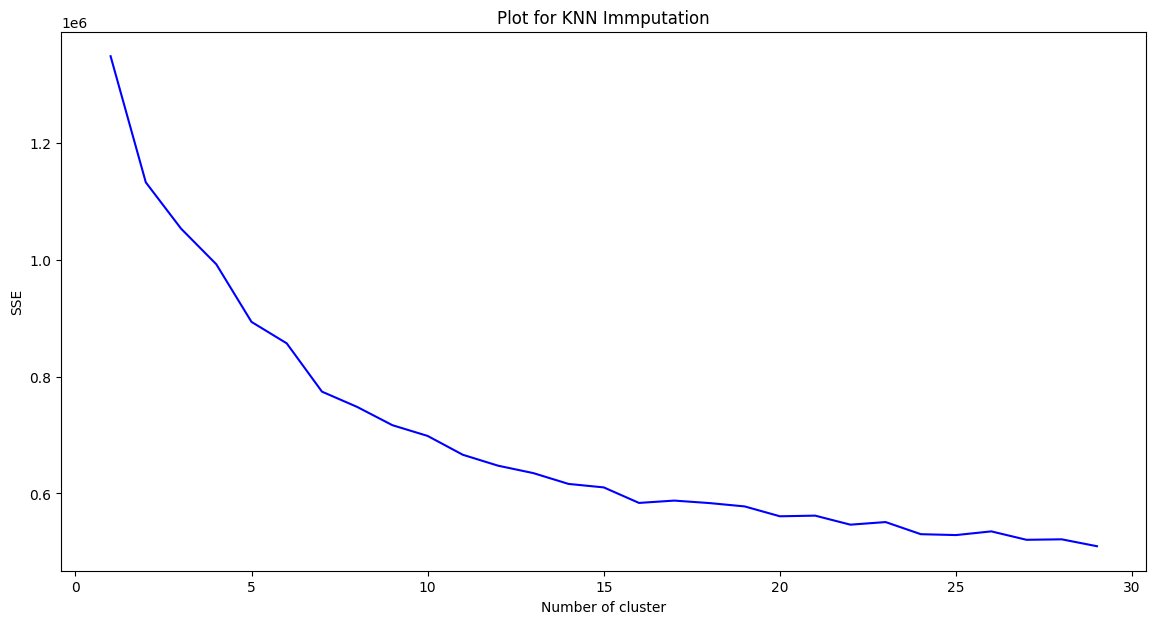

Running for  KNN Imputation with (default) 5 neighbours


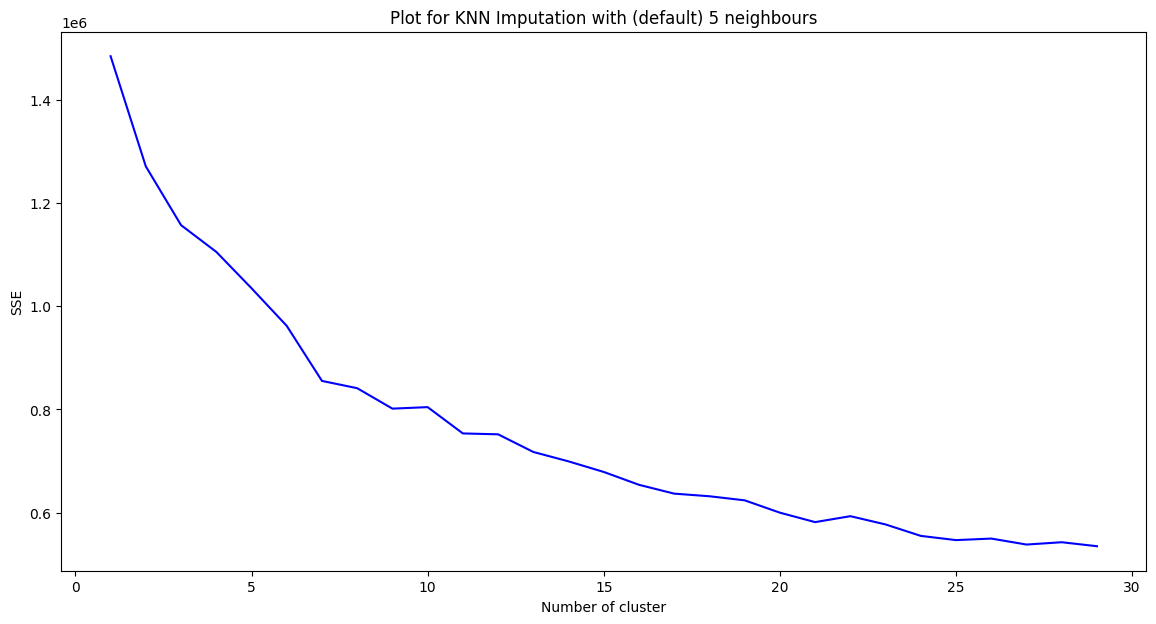

Running for  Mean Imputation 


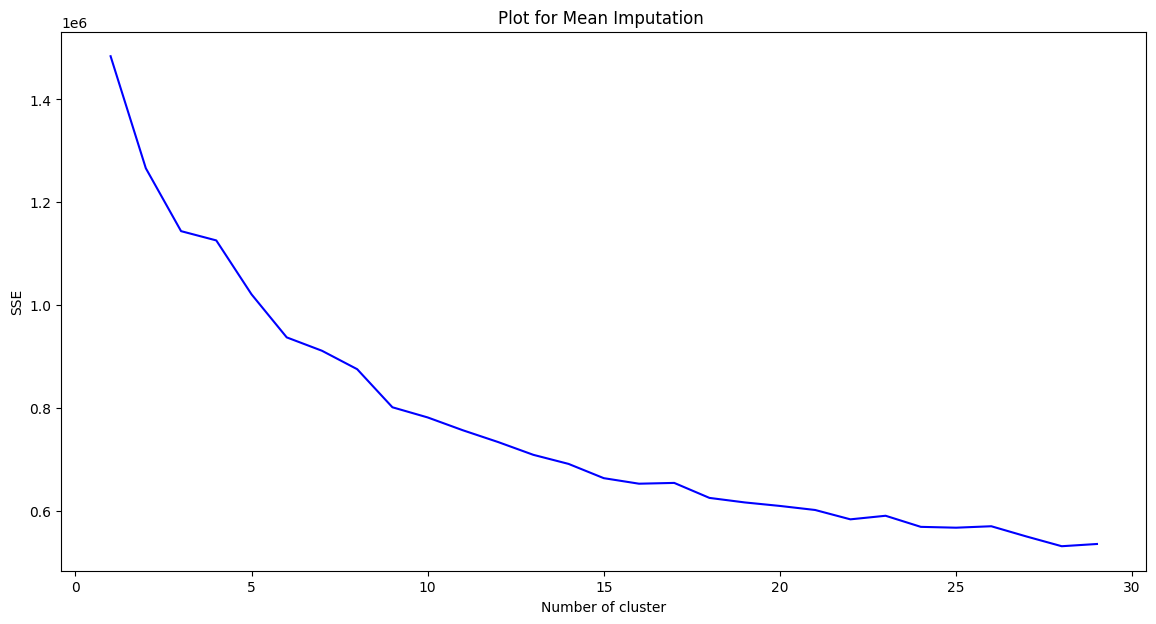

Running for  KNN Immputation + PCA


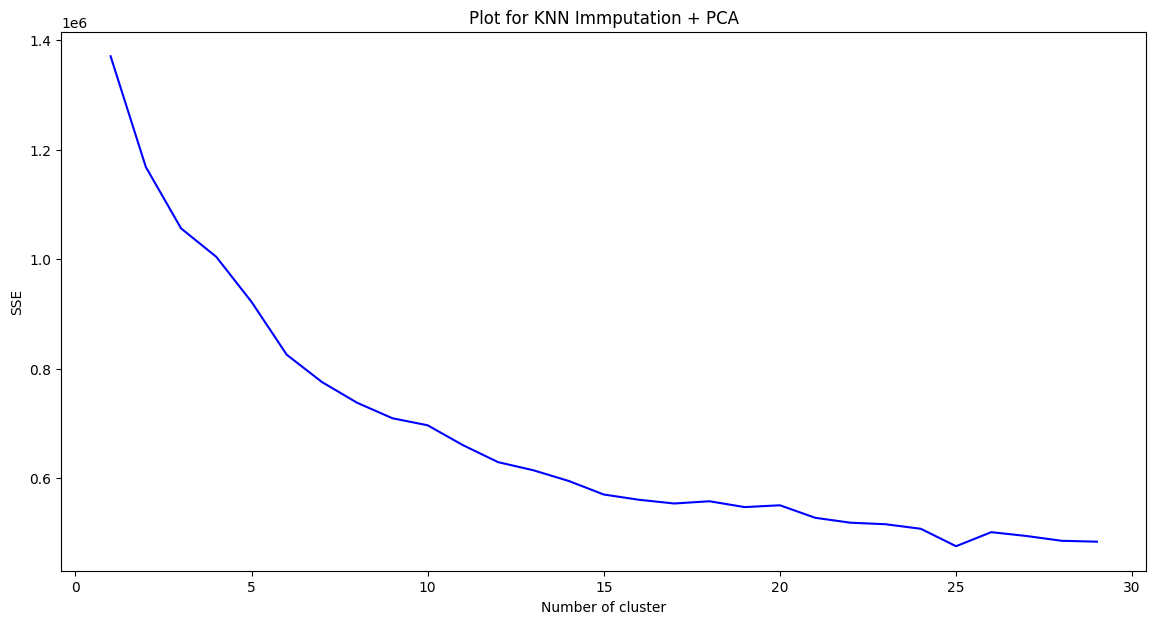

Running for  KNN Imputation Unscaled data


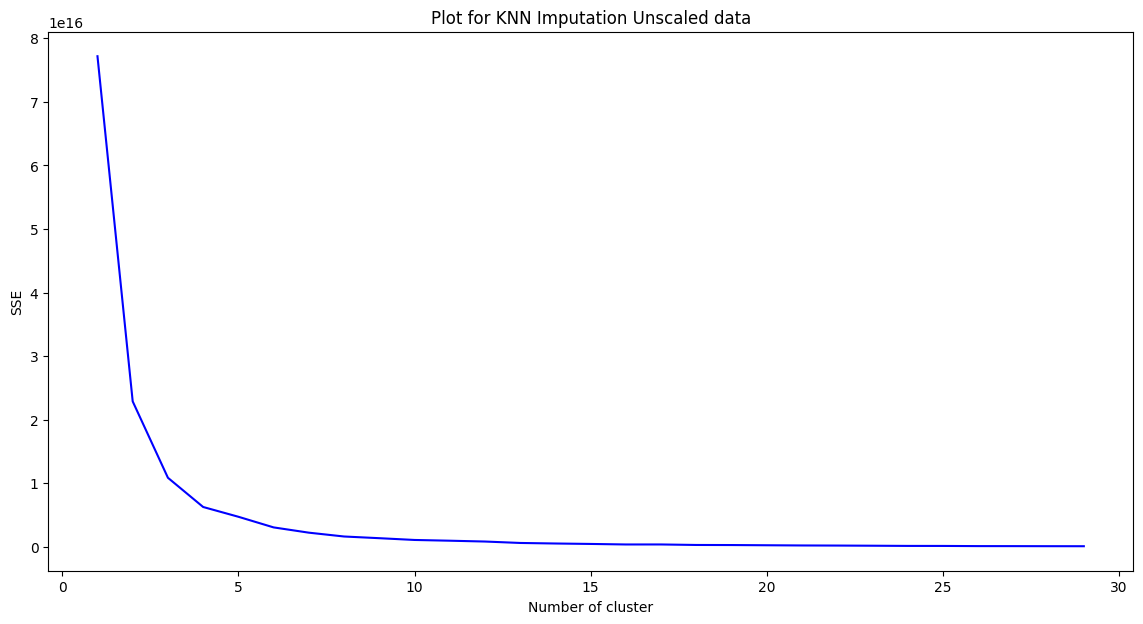

In [ ]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Immputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    X = pipeline.fit_transform(df)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        X.columns= df.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        #print('K :',k)
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0).fit(X)
        label = kmeans.labels_
        df["clusters"] = label
        #print(data["clusters"])
        sse[k] = kmeans.inertia_

        #sil_score[k] = silhouette_score(X, label, metric='euclidean')

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()

Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data

Insight and Recomendations:

1. No duplicate rows.Each email-hash is a group of records.
2. If we view records associated with multiple records we find that there is some records for PII having same company_hash, orgyear, with differemt job_position that means one employee is joining in two post in same company in same orgyear that cant possible.
for eg. 102915	103145	oxej ntwyzgrgsxto rxbxnta	bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...	2018.0	720000	FullStack Engineer	2020.0
117764	118076	oxej ntwyzgrgsxto rxbxnta	bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...	2018.0	720000	Data Analyst	2020.0
3. 205843 rows now shrink to 153443 rows after eliminating or taking first records of same group.
4. There are 10529 outlier in ctc and 2572 in ctc_updated_year.
5. Nvnv Wgzohrnvzwj is the compnay where most of the staff works (5000).
2015-2019 is the most orgyear.
almost 35000 employees are Backend Engineeers. 2019 is the most Ctc update year.0.3 to 1.0 bin is the range of the CTC of many employees.
6. Devops Engineer is the most and Engineering Leadership and Backend Engineer are the next two high paying job position.Top paying company is Oygubvnxw. Otctz Rvpto Ntwyzgargsxto and Qvkgquvj are highest paying company in 2016 whereas zvz in 2021.Mean CTC is decreasing yearwise . highest is in 2016 if calculated from 2016.and least in 2021
7. Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data



